In [129]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [130]:
#it is better to import this lib:
import html5lib


In [131]:
url= 'https://www.eia.gov/dnav/pet/hist/rwtcD.htm'

In [132]:
#We use the read_html method of the Pandas library to read the HTML tables.this will return a list of df.
#skiprows skip anyrow we wish, here we set it to 0 because we need all of it(we dont need it here).
#header makes the heads of the columns
# we need to add [0] if need to select first item of returened list, because read_html return list of DataFrames:

 
df_1 = pd.read_html(url, header=0)[5]
df_1

,Week Of,Mon,Tue,Wed,Thu,Fri
0,1985 Dec-30 to Jan- 3,NaN,NaN,NaN,25.56,26.00
1,1986 Jan- 6 to Jan-10,26.53,25.85,25.87,26.03,25.65
2,1986 Jan-13 to Jan-17,25.08,24.97,25.18,23.98,23.63
3,1986 Jan-20 to Jan-24,21.33,20.61,20.25,19.93,19.45
4,1986 Jan-27 to Jan-31,20.87,19.45,19.61,19.58,18.95
...,...,...,...,...,...,...
2174,2020 Sep-21 to Sep-25,39.26,39.55,39.92,40.11,40.06
2175,2020 Sep-28 to Oct- 2,40.47,39.03,40.05,38.51,36.90
2176,2020 Oct- 5 to Oct- 9,39.12,40.52,39.82,41.04,40.44
2177,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# to drop column:
df = df_1.drop(['Tue', 'Wed', 'Thu', 'Fri'], axis=1)
df.head()

,Week Of,Mon
0,1985 Dec-30 to Jan- 3,NaN
1,1986 Jan- 6 to Jan-10,26.53
2,1986 Jan-13 to Jan-17,25.08
3,1986 Jan-20 to Jan-24,21.33
4,1986 Jan-27 to Jan-31,20.87


In [134]:
#to drop rows:
#df1 = df.drop([0, 1, 2, 3])


In [135]:
df.dtypes

Week Of     object
Mon        float64
dtype: object

In [136]:
# we applied this function to get rid of $ signs:
#df1.Average = df1.Average.str.replace('$','').astype(float)
#df1.Low = df1.Low.str.replace('$','').astype(float)
#df1.High = df1.High.str.replace('$','').astype(float)


In [137]:
# we only select the last 31 entries, so we drop the first rows. We also drop the other two columns:
#df2 = df1.drop([4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18])
#df2 = df1.drop(['Low', 'High'], axis=1)


In [138]:
df.dtypes

Week Of     object
Mon        float64
dtype: object

In [139]:
subset = df.rename(columns={'Week Of':'Date', 'Mon':'OilPrice'})
len(subset)#.head()

2179

In [140]:
#Checking the missing values
round_1.isnull().sum()

Date        363
OilPrice      0
dtype: int64

In [141]:
# Checking for the mean and median of the column so as to know what to fill the non values with
print(round_1['OilPrice'].mean())
print(round_1['OilPrice'].median())

43.731161083065366
43.7


In [142]:
set(subset['OilPrice'])

{nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 10.25,
 11.98,
 12.2,
 12.48,
 14.68,
 14.39,
 16.78,
 17.42,
 13.34,
 14.32,
 20.87,
 21.33,
 15.75,
 19.0,
 19.43,
 25.08,
 26.53,
 20.07,
 21.38,
 20.91,
 21.03,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 39.05,
 37.08,
 38.88,
 35.28,
 38.0,
 37.29,
 38.26,
 41.53,
 42.03,
 41.55,
 43.83,
 44.86,
 46.02,
 46.0,
 46.33,
 49.56,
 49.85,
 53.65,
 53.59,
 55.52,
 53.9,
 54.9,
 56.7,
 56.86,
 59.19,
 59.78,
 59.23,
 61.51,
 63.92,
 66.21,
 14.0,
 14.25,
 14.5,
 67.41,
 67.21,
 68.06,
 70.3,
 70.19,
 73.75,
 73.5,
 75.7,
 77.05,
 76.82,
 80.31,
 77.53,
 17.5,
 86.19,
 87.6,
 87.72,
 88.15,
 18.5,
 90.69,
 90.07,
 93.56,
 94.06,
 94.4,
 94.0,
 95.75,
 19.25,
 97.66,
 20.5,
 20.0,
 99.4,
 20.25,
 96.29,
 21.5,
 21.25,
 21.0,
 106.35,
 107.9,
 22.5,
 22.25,
 111.71,
 108.91,
 114.44,
 23.75,
 117.48,
 114.85,
 118.78,
 112.92,
 121.45,
 122.61,
 24.75,
 124.72,
 124.02,
 25.25,
 25.5,
 25.75,
 127.15,
 127.75,
 2

In [143]:
# Filling the missing values with the mean value of the column
subset['OilPrice'].fillna(43.74, inplace =True)


In [144]:
subset.isnull().sum()

Date        363
OilPrice      0
dtype: int64

In [145]:
subset.nlargest(60,'OilPrice')

,Date,OilPrice
1411,2008 Jul-14 to Jul-18,145.16
1410,2008 Jul- 7 to Jul-11,141.38
1408,2008 Jun-30 to Jul- 4,139.96
1407,2008 Jun-23 to Jun-27,135.98
1406,2008 Jun-16 to Jun-20,134.52
1405,2008 Jun- 9 to Jun-13,134.44
1412,2008 Jul-21 to Jul-25,131.43
1404,2008 Jun- 2 to Jun- 6,127.75
1401,2008 May-19 to May-23,127.15
1413,2008 Jul-28 to Aug- 1,124.72


In [146]:
# Round the values in column OilPrice to 1 decimal place
round_1  = subset.round({'OilPrice':1})
round_1

,Date,OilPrice
0,1985 Dec-30 to Jan- 3,43.7
1,1986 Jan- 6 to Jan-10,26.5
2,1986 Jan-13 to Jan-17,25.1
3,1986 Jan-20 to Jan-24,21.3
4,1986 Jan-27 to Jan-31,20.9
...,...,...
2174,2020 Sep-21 to Sep-25,39.3
2175,2020 Sep-28 to Oct- 2,40.5
2176,2020 Oct- 5 to Oct- 9,39.1
2177,NaN,43.7


In [147]:
#this is to save the OilPrice column into CSV:
round_1.to_csv('new.oil.data_csv',index=False)

In [160]:
# checking the oil dataset 
oil = pd.read_csv('new.oil.data_csv')

oil.isnull().sum()
oil.head()

,Date,OilPrice
0,1985 Dec-30 to Jan- 3,43.7
1,1986 Jan- 6 to Jan-10,26.5
2,1986 Jan-13 to Jan-17,25.1
3,1986 Jan-20 to Jan-24,21.3
4,1986 Jan-27 to Jan-31,20.9


In [162]:
oil_1 = oil['OilPrice']
oil_1

0       43.7
1       26.5
2       25.1
3       21.3
4       20.9
        ... 
2174    39.3
2175    40.5
2176    39.1
2177    43.7
2178    39.2
Name: OilPrice, Length: 2179, dtype: float64

In [163]:
gold = pd.read_csv('gld_price_data.csv')
gold.head()
#len(gold)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [164]:
# this is to choose the rows we want
gold2 = gold.loc[0:2178]
gold2.head()
#len(gold2)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [165]:
gold2.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

# Here you need to use two columns of gold database: Date and SLV, then concat the oilPrice into it:

In [170]:
Silver = gold2[['Date',"SLV"]]
Silver

,Date,SLV
0,1/2/2008,15.180000
1,1/3/2008,15.285000
2,1/4/2008,15.167000
3,1/7/2008,15.053000
4,1/8/2008,15.590000
...,...,...
2174,11/15/2017,16.030001
2175,11/20/2017,15.980000
2176,11/21/2017,16.010000
2177,11/22/2017,16.170000


In [167]:
silver = gold2.loc[:,'SLV']
# df.loc[df['Age']
len(silver)
silver.round(1)


0       15.2
1       15.3
2       15.2
3       15.1
4       15.6
        ... 
2174    16.0
2175    16.0
2176    16.0
2177    16.2
2178    16.1
Name: SLV, Length: 2179, dtype: float64

In [168]:
len(silver)

2179

In [177]:
data = pd.concat([Silver, oil_1], axis=1)
data.head(60)

,Date,SLV,OilPrice
0,1/2/2008,15.180000,43.7
1,1/3/2008,15.285000,26.5
2,1/4/2008,15.167000,25.1
3,1/7/2008,15.053000,21.3
4,1/8/2008,15.590000,20.9
5,1/9/2008,15.520000,43.7
6,1/10/2008,16.061001,17.4
7,1/11/2008,16.077000,16.8
8,1/14/2008,16.280001,43.7
9,1/15/2008,15.834000,14.7


In [173]:
# checking to confirm if there is any missing value in our final dataset
data.isnull().sum()

Date        0
SLV         0
OilPrice    0
dtype: int64

In [174]:
len(data)

2179

TypeError: nan is not a string

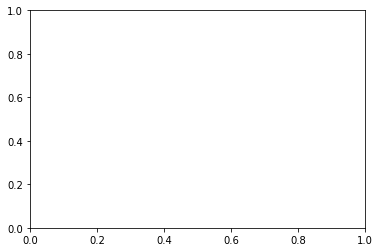

In [157]:
data.plot.scatter(x='Date', y='OilPrice' )

plt.show()

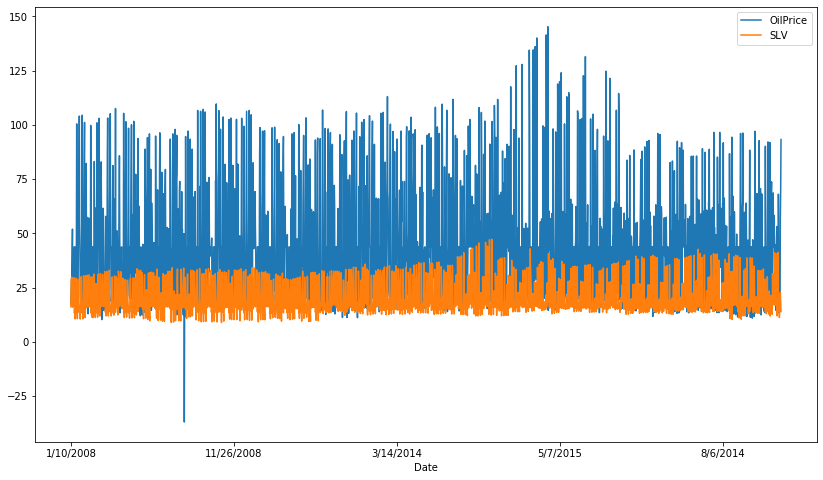

In [175]:
grouped = data.groupby(['Date']) ['OilPrice', 'SLV'].sum()
grouped.plot(figsize=(14,8))
plt.show()